In [14]:
# Importing the required libraries
# For linear algebra
import numpy as np
# For data processing and reading CSV file
import pandas as pd
# For visualization
import seaborn as sns
import matplotlib.pyplot as plt
# overwrite lib:https://stackoverflow.com/questions/50591982/importerror-cannot-import-name-timestamp
from ggplot import *
%matplotlib inline
import matplotlib.pyplot as plt

In [15]:
# Loading the Data
df = pd.read_excel (r'default_of_credit_card_clients_header.xls', header = 0)
print (df.sample(5))
print ('_____________________________________________________________________')

# Finding the dimensions of the Data
print (df.shape)
print ('_____________________________________________________________________')

# The output means:  there are 30,000 entries with 25 columns

# Taking a peek at the data, checking data type. and inspecting the data in statistical summary.
print (df.info ())
print ('_____________________________________________________________________')
# The output means: it is clear that there is no data type mismatching in any column.

# Get statistical information.
print (df.describe ())

          ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
20840  20841     500000    1          1         1   41      0      0      2   
13826  13827     240000    2          1         2   30     -1     -1      0   
25390  25391     220000    2          2         2   29      0      0      2   
24346  24347     150000    1          1         2   32      0      0      0   
20273  20274     320000    2          1         2   50     -1     -1     -1   

       PAY_4             ...              BILL_AMT4  BILL_AMT5  BILL_AMT6  \
20840      2             ...                   -121        679        529   
13826      0             ...                  22749       7804        290   
25390      0             ...                  39770      31840      33173   
24346      0             ...                  38495      35807      24871   
20273     -1             ...                  12360      10943       9597   

       PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_A

In [ ]:
## Initial Analysis

In [16]:
# Checking missing values.
df.isnull().sum().sort_values(ascending = False)
# The output means:  There is no missing value.

default payment next month    0
PAY_6                         0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
BILL_AMT1                     0
PAY_AMT6                      0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
ID                            0
dtype: int64

In [7]:
# Univiriable Analysis

In [17]:
# For three categorical values, SEX, EDUCATION, MARRIAGE, we'll check how they are devided and if there are any sparse
# classes may cause problems in the following steps.
print (df.SEX.value_counts ())
print ('___________________')
print (df.EDUCATION.value_counts ())
print ('___________________')
print (df.MARRIAGE.value_counts ())
# For SEX, there are 2 classes, men and women, and women are more than men. It's OK and can be plotted.
# For EDUCATION, there are 7 classes, which is more than the number 4 in data documentation. 
# For MARRIAGE, there 4 classes, in which the 0 is undocumented. 

2    18112
1    11888
Name: SEX, dtype: int64
___________________
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64
___________________
2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64


Text(0.5, 1.0, 'Fig.1 : Default Payment Distritution Bar Plot ')

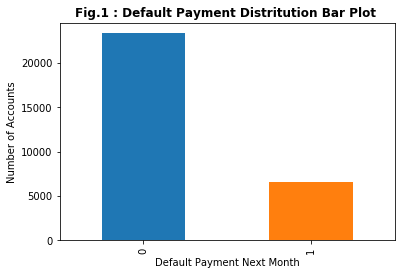

In [81]:
# Default facts, feature name: 'default_pay'
# Let's show 'default_pay' distritution in bar plot.
df.default_pay.value_counts (). plot (kind = 'bar')
plt.xlabel ('Default Payment Next Month');plt.ylabel('Number of Accounts')
plt.title ('Fig.1 : Default Payment Distritution Bar Plot ',fontweight = "bold", size = 12)
# From the result we can see the dataset is imbalance, so accuracy is not a good metric for predictive models when 
# classifying in predictive analytics. Precision and recall are better measures in such cases.

Text(0.5, 1.0, 'Fig.1 : SEX Distritution Bar Plot ')

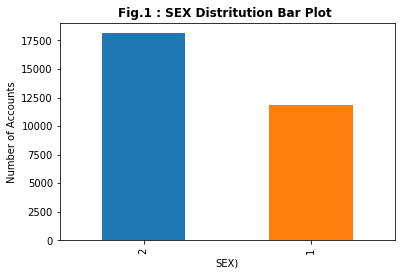

In [80]:
# Gender, feature name: 'SEX'.
# Let's show SEX distritution in bar plot.
df.SEX.value_counts (). plot (kind = 'bar')
plt.xlabel ('SEX)');plt.ylabel('Number of Accounts')
plt.title ('Fig.2 : SEX Distritution Bar Plot ',fontweight = "bold", size = 12)

grad_scholl 10585
__________________
university 14030
__________________
high_scholl 4917
__________________
five 0
__________________
six 0
__________________
zero 0
__________________
total_education 30000
grad_scholl 10585
__________________
university 14030
__________________
high_scholl 4917
__________________
five 0
__________________
six 0
__________________
zero 0
__________________
total_education 30000


Text(0.5, 1.0, 'Fig.3 : EDUCATION Distritution Barh Plot ')

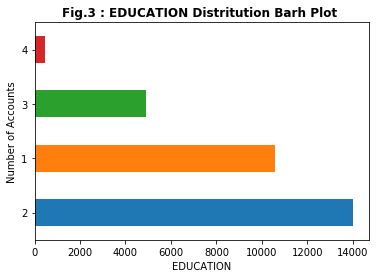

In [86]:
# Education degree, feature name: EDUCATION
# Find out the inconsistency values in numbers.
graduate = df ['EDUCATION'] [df['EDUCATION'] == 1]. count ()
university = df ['EDUCATION'] [df ['EDUCATION'] == 2]. count ()
high = df ['EDUCATION'] [df ['EDUCATION'] == 3]. count ()
other = df ['EDUCATION'] [df ['EDUCATION'] == 4]. count ()
five = df ['EDUCATION'] [df['EDUCATION'] == 5]. count ()
six = df ['EDUCATION'] [df['EDUCATION'] == 6]. count ()
zero = df ['EDUCATION'] [df['EDUCATION'] == 0]. count ()
total_education = graduate + university + high + other + five + six + zero
print ('grad_scholl', graduate)
print ('__________________')
print ('university', university)
print ('__________________')
print ('high_scholl', high)
print ('__________________')
print ('five', five)
print ('__________________')
print ('six', six)
print ('__________________')
print ('zero', zero)
print ('__________________')
print ('total_education', total_education)
# The result means: there are 345 inconsistent values as undocumented: 280 of them with "5", 51 of them with "6", 
# and 14 of them with "0". In this feature, we can change the undocumented 0, 5, and 6 into 4, others.

# To deal with the inconsistency values, we reassign all of the value with "0", "5" and "6" in EDUCATION to "4".
df ['EDUCATION'] [df['EDUCATION'] == 0] = 4
df ['EDUCATION'] [df['EDUCATION'] == 5] = 4
df ['EDUCATION'] [df['EDUCATION'] == 6] = 4

# Now check the result.
graduate = df ['EDUCATION'] [df['EDUCATION'] == 1]. count ()
university = df ['EDUCATION'] [df ['EDUCATION'] == 2]. count ()
high = df ['EDUCATION'] [df ['EDUCATION'] == 3]. count ()
other = df ['EDUCATION'] [df ['EDUCATION'] == 4]. count ()
five = df ['EDUCATION'] [df['EDUCATION'] == 5]. count ()
six = df ['EDUCATION'] [df['EDUCATION'] == 6]. count ()
zero = df ['EDUCATION'] [df['EDUCATION'] == 0]. count ()
total_education_new = graduate + university + high + other + five + six + zero
print ('grad_scholl', graduate)
print ('__________________')
print ('university', university)
print ('__________________')
print ('high_scholl', high)
print ('__________________')
print ('five', five)
print ('__________________')
print ('six', six)
print ('__________________')
print ('zero', zero)
print ('__________________')
print ('total_education', total_education_new)
# The result shows the inconsistency problem has been solved.

# Let's show EDUCATION distritution in barh plot.
df.EDUCATION.value_counts ().plot (kind = 'barh')
plt.xlabel ('EDUCATION');plt.ylabel('Number of Accounts')
plt.title ('Fig.3 : EDUCATION Distritution Barh Plot ',fontweight = "bold", size = 12)

married 13659
________________
single 15964
________________
other_m 377
________________
zero 0
________________
total_marriage 30000
married 13659
________________
single 15964
________________
other_m 377
________________
zero 0
________________
total_marriage 30000


Text(0.5, 1.0, 'Fig.4 : MARRIAGE Distritution Bar Plot ')

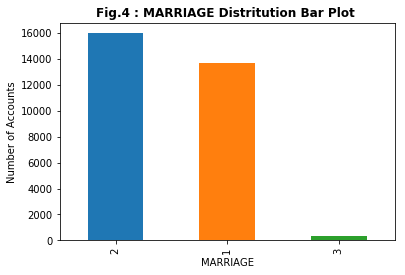

In [84]:
# Marriage status, feature name: MARRIAGE.
# Find out he inconsistency in numbers.
married = df['MARRIAGE'] [df ['MARRIAGE'] == 1]. count ()
single = df['MARRIAGE'] [df['MARRIAGE'] == 2]. count () 
other_m = df['MARRIAGE'] [df['MARRIAGE'] == 3]. count ()
zero_m = df['MARRIAGE'] [df['MARRIAGE'] == 0]. count ()
total_marriage = married + single + other_m + zero_m
print ('married', married)
print ('________________')
print ('single', single)
print ('________________')
print ('other_m', other_m)
print ('________________')
print ('zero', zero)
print ('________________')
print ('total_marriage', total_marriage)
# There are 14 undocumented values labeled 0. 

# Again, to deal with the inconsistency values, we reassign all of the value with 0 into 3, others.
df ['MARRIAGE'] [df['MARRIAGE'] == 0] = 3

# Now check the result.
married = df['MARRIAGE'] [df ['MARRIAGE'] == 1]. count ()
single = df['MARRIAGE'] [df['MARRIAGE'] == 2]. count () 
other_m = df['MARRIAGE'] [df['MARRIAGE'] == 3]. count ()
zero_m = df['MARRIAGE'] [df['MARRIAGE'] == 0]. count ()
total_marriage_new = married + single + other_m + zero_m
print ('married', married)
print ('________________')
print ('single', single)
print ('________________')
print ('other_m', other_m)
print ('________________')
print ('zero', zero)
print ('________________')
print ('total_marriage', total_marriage_new)
# There is no more inconsistent value in MARRIAGE now. 

# Let's show MARRIAGE distritution in bar plot.
df.MARRIAGE.value_counts (). plot (kind = 'bar')
plt.xlabel ('MARRIAGE');plt.ylabel('Number of Accounts')
plt.title ('Fig.4 : MARRIAGE Distritution Bar Plot ',fontweight = "bold", size = 12)

Text(0.5, 1.0, 'Fig.5 : AGE Distritution Bar Plot ')

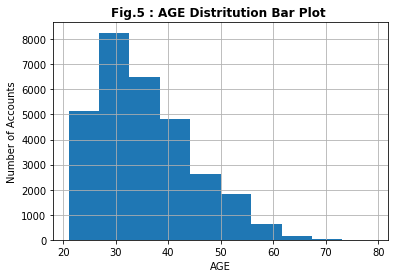

In [85]:
# Age, feature name: AGE
# Show AGE distribution in histogram plot.
df.AGE.hist ()
plt.xlabel ('AGE');plt.ylabel('Number of Accounts')
plt.title ('Fig.5 : AGE Distritution Histogram Plot ',fontweight = "bold", size = 12)

(81,)
__________________
head 50000     3365
20000     1976
30000     1610
80000     1567
200000    1528
Name: LIMIT_BAL, dtype: int64
tail 800000     2
760000     1
690000     1
1000000    1
327680     1
Name: LIMIT_BAL, dtype: int64


Text(0.5, 1.0, 'Fig.6 : Amount of Given Credit Distritution Histogram Plot ')

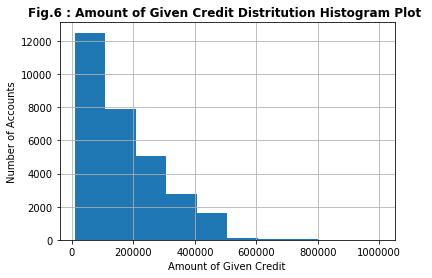

In [88]:
# Amount of given credit, feature name: 'LIMIT_BAL'.
# To verify if it is a feature in large range.
print (df.LIMIT_BAL.value_counts().shape)

# There are 81 distinct values for amount of credit limit.
# To get more detailed sense, check the largest amount and smallest amount.
print ('__________________')
print ('head', df ['LIMIT_BAL'].value_counts().head(5))
print ('tail', df ['LIMIT_BAL'].value_counts().tail(5))

# Show the amount of given credit distribution in histogram plot.
df.LIMIT_BAL.hist ()
plt.xlabel ('Amount of Given Credit');plt.ylabel('Number of Accounts')
plt.title ('Fig.6 : Amount of Given Credit Distritution Histogram Plot ',fontweight = "bold", size = 12)

In [23]:
# History of past payment, feature name: 'PAY_'.

# Correct 'PAY_0' into 'PAY_1'.
df.rename (columns =  {'PAY_0':'PAY_1'}, inplace = True)
# df.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'}, inplace=True)

# According to the documentation of the dataset, all the values of this feature range from 0 to 9. So adjust 
# the values below '1' into '0'.
adj1 = df.PAY_1 < 1
df.loc[adj1, 'PAY_1'] = 0
adj2 = df.PAY_2 < 1
df.loc[adj1, 'PAY_2'] = 0
adj3 = df.PAY_1 < 1
df.loc[adj1, 'PAY_3'] = 0
adj4 = df.PAY_4 < 1
df.loc[adj1, 'PAY_4'] = 0
adj5 = df.PAY_5 < 1
df.loc[adj1, 'PAY_5'] = 0
adj6 = df.PAY_6 < 1
df.loc[adj1, 'PAY_6'] = 0

# The column name of 'default payment next month' is too long, so rename it.
df.rename (columns =  {'default payment next month':'default_pay'}, inplace = True)

# Check the results.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID             30000 non-null int64
LIMIT_BAL      30000 non-null int64
SEX            30000 non-null int64
EDUCATION      30000 non-null int64
MARRIAGE       30000 non-null int64
AGE            30000 non-null int64
PAY_1          30000 non-null int64
PAY_2          30000 non-null int64
PAY_3          30000 non-null int64
PAY_4          30000 non-null int64
PAY_5          30000 non-null int64
PAY_6          30000 non-null int64
BILL_AMT1      30000 non-null int64
BILL_AMT2      30000 non-null int64
BILL_AMT3      30000 non-null int64
BILL_AMT4      30000 non-null int64
BILL_AMT5      30000 non-null int64
BILL_AMT6      30000 non-null int64
PAY_AMT1       30000 non-null int64
PAY_AMT2       30000 non-null int64
PAY_AMT3       30000 non-null int64
PAY_AMT4       30000 non-null int64
PAY_AMT5       30000 non-null int64
PAY_AMT6       30000 non-null int64
default_pay    30000 non-nu

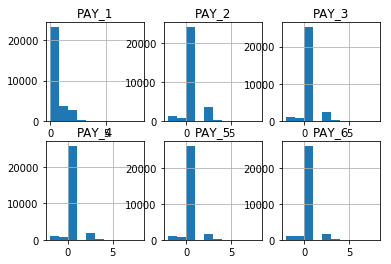

___________________________________________________________


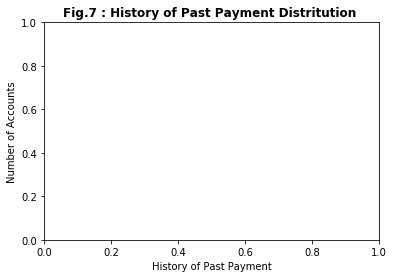

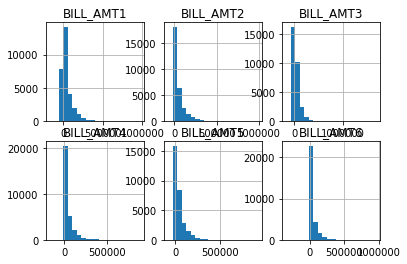

___________________________________________________________


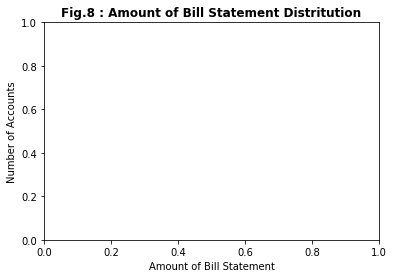

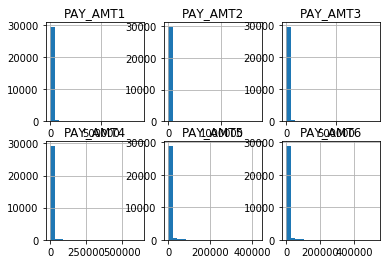

Text(0.5, 1.0, 'Fig.9 : Amount of Previous Payment Distritution')

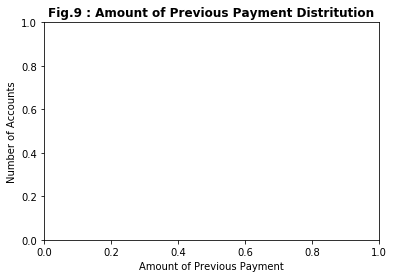

In [94]:
# Define a function to show histograms for the numerical variables.
def draw_histograms(df, variables, n_rows, n_cols, n_bins):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=n_bins,ax=ax)
        ax.set_title(var_name)
    plt.show()
    
late = df[['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
draw_histograms(late, late.columns, 2, 3, 10)
plt.show()
plt.xlabel ('History of Past Payment');plt.ylabel('Number of Accounts')
plt.title ('Fig.7 : History of Past Payment Distritution ',fontweight = "bold", size = 12)
print ('___________________________________________________________')
bills = df[['BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]
draw_histograms(bills, bills.columns, 2, 3, 20)
plt.xlabel ('Amount of Bill Statement');plt.ylabel('Number of Accounts')
plt.title ('Fig.8 : Amount of Bill Statement Distritution',fontweight = "bold", size = 12)
print ('___________________________________________________________')
pay = df[['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]
draw_histograms(pay, pay.columns, 2, 3, 20)
plt.xlabel ('Amount of Previous Payment');plt.ylabel('Number of Accounts')
plt.title ('Fig.9 : Amount of Previous Payment Distritution',fontweight = "bold", size = 12)

In [26]:
# Bivariable Analysis

Text(0.5, 1.0, 'Fig.10 : Sex and Default Payment')

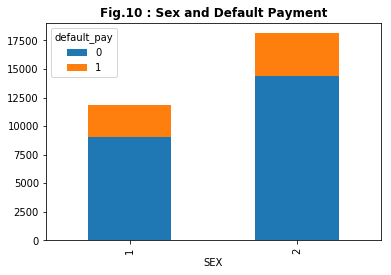

In [95]:
# SEX and DEFAULT_PAY
# Create a crosstable named 'gender', combining SEX, default_pay and the percentage.
gender = pd.crosstab (df.SEX, df.default_pay)
gender.plot(kind='bar', stacked = True)
gender['pct'] = (gender[1]/(gender[0] + gender[1])) 
gender
plt.title ('Fig.10 : Sex and Default Payment',fontweight = "bold", size = 12)
# The result means: men are more likely to default next month. But since there are more women than men in the dataset,
# we need dig in more to see if this conclusion is fair.

Text(0.5, 1.0, 'Fig.11 : Education and Default Payment')

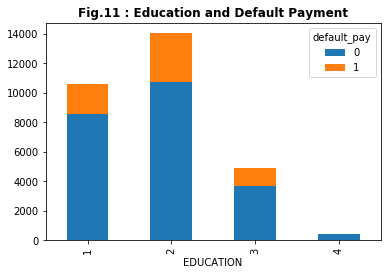

In [96]:
# EDUCATION and DEFAULT_PAY 
# Create a crosstable named 'education', combining EDUCATION, default_pay and the percentage.
education = pd.crosstab (df.EDUCATION, df.default_pay)
education.plot(kind='bar', stacked = True)
education['pct'] = (education[1]/(education[0] + education[1])) 
education
plt.title ('Fig.11 : Education and Default Payment',fontweight = "bold", size = 12)
# The result means: education degree has positive relationship with the possibility of default, while the variable 
#'others' doesn't mean anything, so the low possiblity of default doesn't mean anything either.

Text(0.5, 1.0, 'Fig.12 : Marriage and Default Payment')

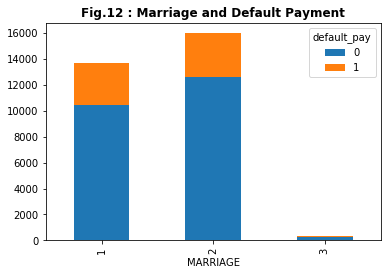

In [97]:
# MARRIAGE and DEFAULT_PAY
# Create a crosstable named 'marriage', combining MARRIAGE, default_pay and the percentage.
marriage = pd.crosstab (df.MARRIAGE, df.default_pay)
marriage.plot(kind='bar', stacked = True)
marriage['pct'] = (marriage[1]/(marriage[0] + marriage[1])) 
marriage
plt.title ('Fig.12 : Marriage and Default Payment',fontweight = "bold", size = 12)
# The result means: roughly, the possiblities of default of any marriage status are close, but sigle people have 
#less default than the other two type of people. 

In [ ]:
## Multivariate Analysis

In [ ]:
# Correlation
# Interpretation the absolute value of correlation: 
# .00-.19 very weak; 
# .20-.39 weak; 
# .40-.59 moderate; 
# .60-.79 strong; 
# .80-1.0 very strong.

   SEX  EDUCATION  MARRIAGE
0    2          2         1
1    2          2         2
2    2          2         2
3    2          2         1
4    1          2         1
5    1          1         2
6    1          1         2
7    2          2         2
8    2          3         1
9    1          3         2


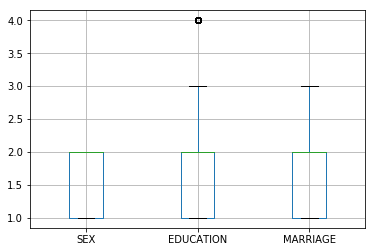

Text(0.5, 1.0, 'Fig.14 : Sex, Education and Marriage Correlation')

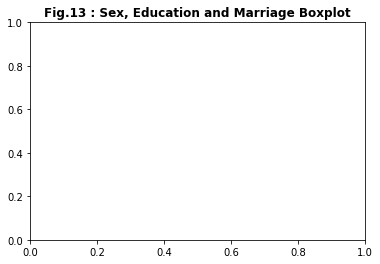

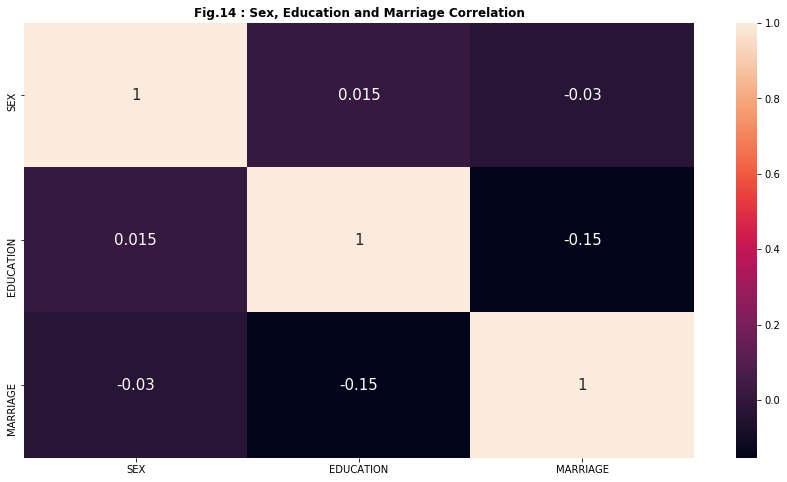

In [99]:
# SEX, EDUCATION, and MARRIAGE
# Create a subset 'sex_edu_marr', combining the 3 variables. 
sex_edu_marr = df [['SEX', 'EDUCATION', 'MARRIAGE']]
print (sex_edu_marr.head(10))

# Find out the distribution of the 4 variables.
sex_edu_marr.boxplot ()
plt.show()
plt.title ('Fig.13 : Sex, Education and Marriage Boxplot',fontweight = "bold", size = 12)

# The 3 variables aren't normal distributied, so generate the correlation between them by Spearman method.
corr_sex_edu_marr = sex_edu_marr.corr(method = 'spearman') 
plt.figure(figsize=(15,8))
sns.heatmap(corr_sex_edu_marr, annot=True, annot_kws={"size": 15})
plt.title ('Fig.14 : Sex, Education and Marriage Correlation',fontweight = "bold", size = 12)
# The result shows: there is no correlation between either of the variables.

# Method 2:
# corr_sex_edu_marr_2 = sex_edu_marr.corr()
# f, ax = plt.subplots(figsize =(9, 8)) 
# sns.heatmap(corr_sex_edu_marr_2, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 

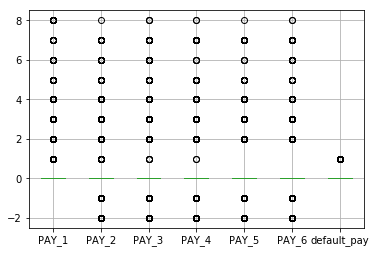

Text(0.5, 1.0, 'Fig.16 : History of Past Payment and Default Payment Correlation')

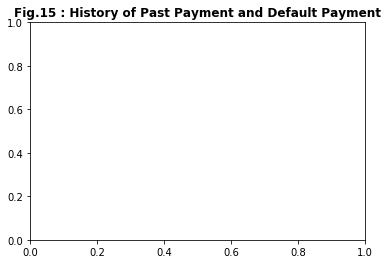

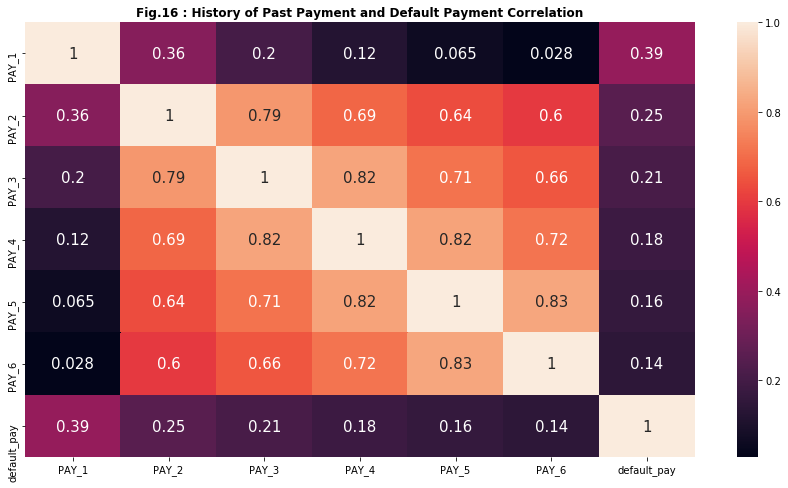

In [100]:
# History of past payment, feature name: 'PAY_'
# Subset a dataframe named 'subset_pay', combining 6 'PAY_' variables and 'DEFAULT_PAY'.
subset_late = df[['PAY_1', 'PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','default_pay']]
subset_late.head ()

# Find out the distribution of the variables.
subset_late.boxplot ()
plt.show()
plt.title ('Fig.15 : History of Past Payment and Default Payment',fontweight = "bold", size = 12)

# These variables aren't normal distributied, so generate the correlation between them by Spearman method.
corr_subset_late = subset_late.corr(method = 'spearman') 
plt.figure(figsize=(15,8))
sns.heatmap(corr_subset_late, annot=True, annot_kws={"size": 15})
plt.title ('Fig.16 : History of Past Payment and Default Payment Correlation',fontweight = "bold", size = 12)
# The result shows: 
# there is strong correlation between PAY_2 and the other variables except for PAY_3; 
# there is strong correlation between PAY_3 and PAY_2\5\6; 
# there is very strong correlation between PAY_3 and PAY_4;
# there is strong correlation between PAY_4 and PAY_2\6;
# there is very strong correlation between PAY_4 and PAY_3\5;
# there is strong correlation between PAY_5 and PAY_2\3;
# there is very strong correlation between PAY_5 and PAY_4\6;
# there is strong correlation between PAY_6 and PAY_2\3;
# there is very strong correlation between PAY_6 and PAY_4\5.
# So we'll remove PAY_4 and PAY_5 from the model training process.??


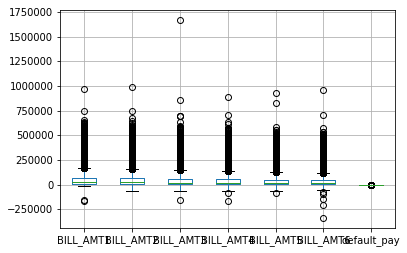

Text(0.5, 1.0, 'Fig.17 : Amount of Bill Statement and Default Payment Correlation')

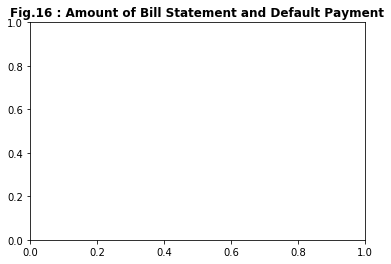

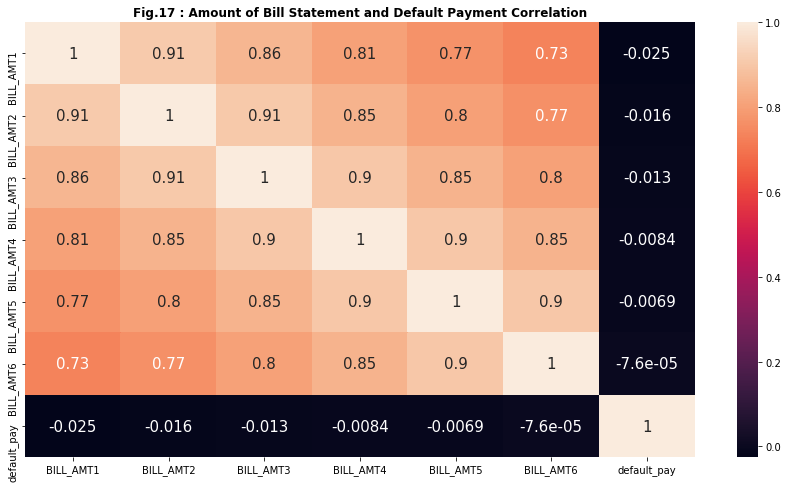

In [101]:
# Amount of bill statement, feature name: 'BILL_AMT'
# Subset a dataframe named 'subset_bill', combining 6 'BILL_AMT' variables and 'DEFAULT_PAY'.
subset_bill = df[['BILL_AMT1', 'BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','default_pay']]
subset_bill.head ()

# Find out the distribution of the variables.
subset_bill.boxplot ()
plt.show()
plt.title ('Fig.16 : Amount of Bill Statement and Default Payment',fontweight = "bold", size = 12)

# These variables aren't normal distributied, so generate the correlation between them by Spearman method.
corr_subset_bill = subset_bill.corr(method = 'spearman') 
plt.figure(figsize=(15,8))
sns.heatmap(corr_subset_bill, annot=True, annot_kws={"size": 15})
plt.title ('Fig.17 : Amount of Bill Statement and Default Payment Correlation',fontweight = "bold", size = 12)

# The result shows: 
# the correlarions between either of the variables are strong or even very strong, so we'll remove one of 
# the attributes with correlation value greater than 0.9, which would be 'BILL_AMT2' and 'BILL_AMT4'.??

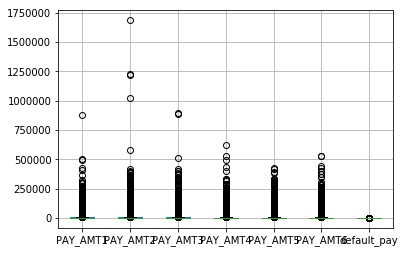

Text(0.5, 1.0, 'Fig.19 : Amount of Previous Payment and Default Payment Correlation')

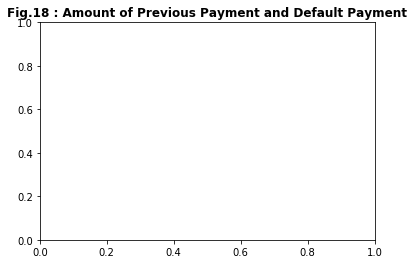

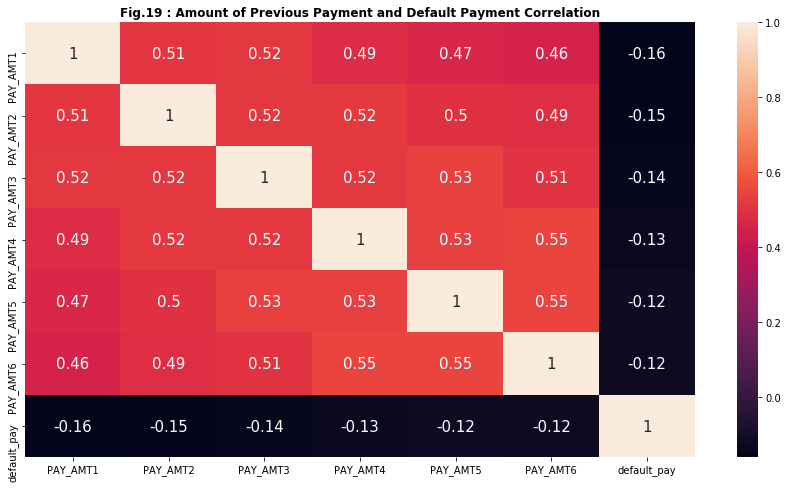

In [103]:
# Amount of previous payment, feature name: 'PAY_AMT'
# Subset a dataframe named 'subset_bill', combining 6 'PAY_AMT' variables and 'DEFAULT_PAY'.
subset_pay = df[['PAY_AMT1', 'PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6','default_pay']]
subset_pay.head ()

# Find out the distribution of the variables.
subset_pay.boxplot ()
plt.show()
plt.title ('Fig.18 : Amount of Previous Payment and Default Payment',fontweight = "bold", size = 12)


# These variables aren't normal distributied, so generate the correlation between them by Spearman method.
corr_subset_pay = subset_pay.corr(method = 'spearman') 
plt.figure(figsize=(15,8))
sns.heatmap(corr_subset_pay, annot=True, annot_kws={"size": 15})
plt.title ('Fig.19 : Amount of Previous Payment and Default Payment Correlation',fontweight = "bold", size = 12)


# The result shows: either of the variables are moderately correlated. We'll leave it.

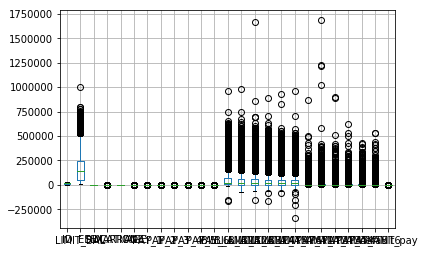

_________________________________________________________


Text(0.5, 1.0, 'Fig.20 : Correlation of All the Features')

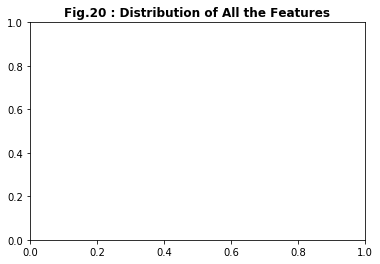

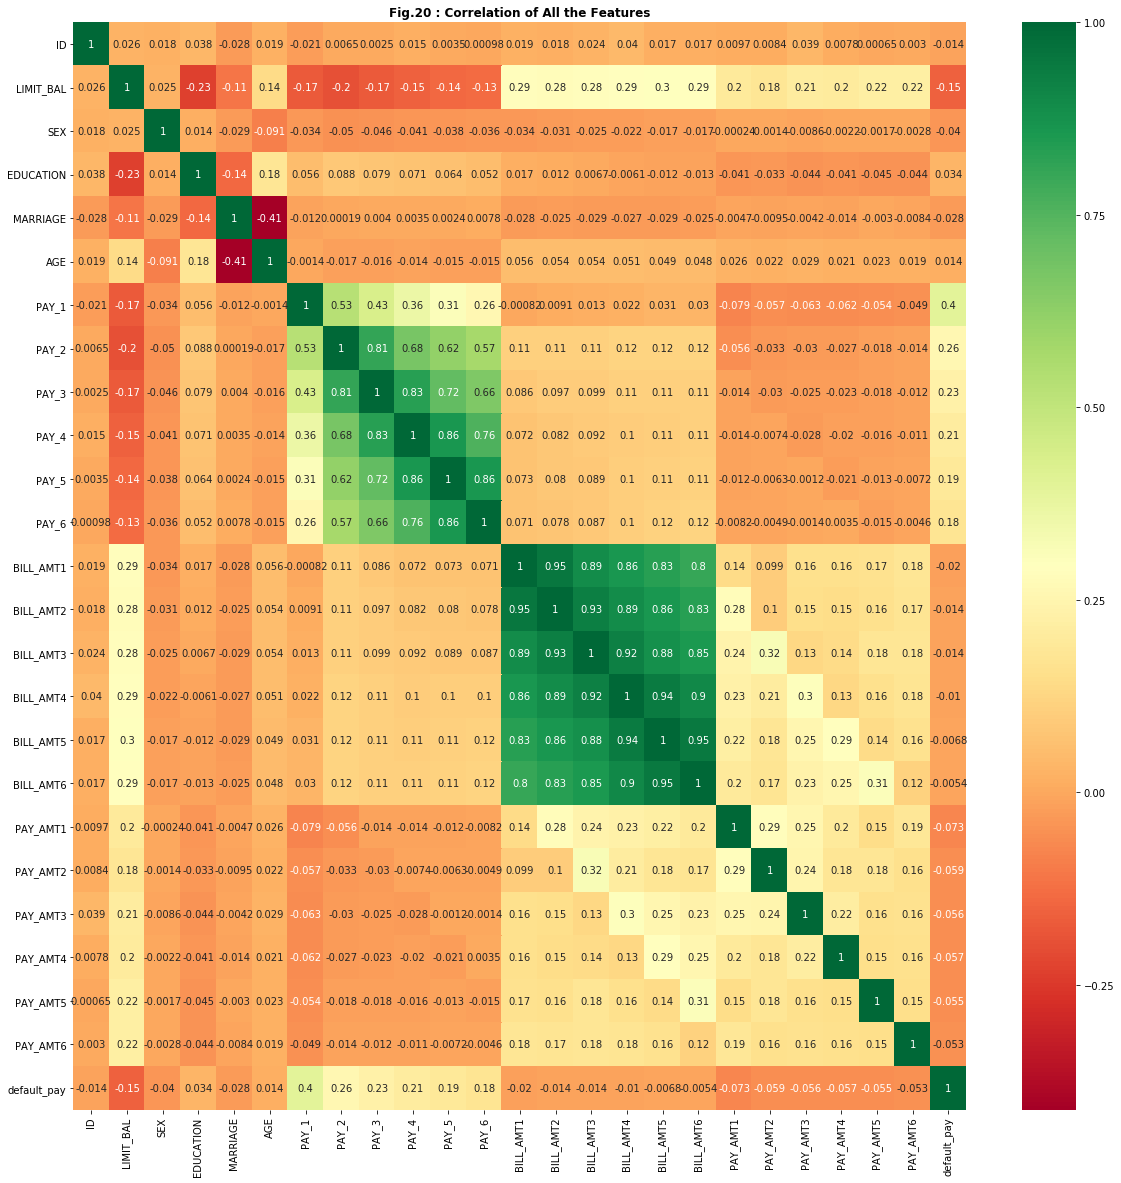

In [106]:
# Correlation of all of the features

# Find out if it is normal distribution of all the variables.
df.boxplot ()
plt.show ()
plt.title ('Fig.20 : Distribution of All the Features',fontweight = "bold", size = 12)
# The result shows: it's not normal distributed, so the spearman correlation is proper.
print('_________________________________________________________')

corr_all = df.corr(method = 'spearman')
top_corr_features = corr_all.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")
plt.title ('Fig.20 : Correlation of All the Features',fontweight = "bold", size = 12)
# The result shows: there is no very strong correlation between either of the dependent variables 
# and the independent variabe.

In [ ]:
## Exploratory Data Analysis 

In [109]:
# Normalization
# Create a new data frame to work with, excluding default_pay. 
df_tem = df.drop (['ID', 'default_pay'], axis=1)
print (df_tem.info ())
print('_________________________________________________________')

# Find out if it is normal distribution of the 23 variables.
#df_tem.boxplot ()
#plt.show ()
#plt.title ('Fig.20 : Distribution of All the Features',fontweight = "bold", size = 12)
# The result shows: it's not normal distributed, so the spearman correlation is proper.
#print('_________________________________________________________')

# Find out the correlation between the 23 variables.
#corr_df_tem = df_tem.corr( method = 'spearman' )
#f, ax = plt.subplots(figsize =(9, 8)) 
#sns.heatmap(corr_df_tem, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 
#plt.title ('Fig.21 : Correlation of All the Features',fontweight = "bold", size = 12)
#print('_________________________________________________________')

# Normalize the dataframe.
df_norm = (df_tem - df_tem.mean()) / (df_tem.max() - df_tem.min())

# Combine the target column 'default_pay' into the normalized dataset.
df_norm ['default_pay'] = df ['default_pay']
print (df_norm.describe ())
print('_________________________________________________________')
default_count = df['default_pay'] [(df['default_pay'] == 1)].count ()
nondefault_count =df['default_pay'] [(df['default_pay'] == 0)].count ()
print(default_count)
print(nondefault_count)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 23 columns):
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_1        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
dtypes: int64(23)
memory usage: 5.3 MB
None
_________________________________________________________
       

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID             30000 non-null int64
LIMIT_BAL      30000 non-null int64
SEX            30000 non-null int64
EDUCATION      30000 non-null int64
MARRIAGE       30000 non-null int64
AGE            30000 non-null int64
PAY_1          30000 non-null int64
PAY_2          30000 non-null int64
PAY_3          30000 non-null int64
PAY_4          30000 non-null int64
PAY_5          30000 non-null int64
PAY_6          30000 non-null int64
BILL_AMT1      30000 non-null int64
BILL_AMT2      30000 non-null int64
BILL_AMT3      30000 non-null int64
BILL_AMT4      30000 non-null int64
BILL_AMT5      30000 non-null int64
BILL_AMT6      30000 non-null int64
PAY_AMT1       30000 non-null int64
PAY_AMT2       30000 non-null int64
PAY_AMT3       30000 non-null int64
PAY_AMT4       30000 non-null int64
PAY_AMT5       30000 non-null int64
PAY_AMT6       30000 non-null int64
default_pay    30000 non-nu

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

Num Features: 15
Selected Features: [ True False  True  True  True  True  True  True  True  True  True  True
 False  True False False False False  True  True False  True False False]
Feature Ranking: [ 1  6  1  1  1  1  1  1  1  1  1  1  2  1  8  5 10  7  1  1  3  1  4  9]
__________________________________________________________________


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.06215267 0.05732498 0.0111254  0.02349784 0.02017482 0.06077225
 0.05692512 0.04715958 0.02476213 0.0460301  0.02140526 0.02111852
 0.04960264 0.04681657 0.04766071 0.04500963 0.04390353 0.04522101
 0.04530854 0.0452515  0.04454437 0.04278461 0.04555875 0.04588946]


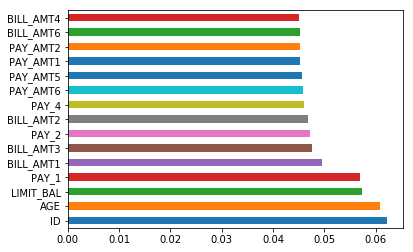

Text(0.5, 1.0, 'Fig.21 : Feature Importance Top 15')

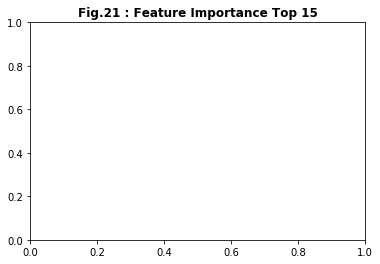

In [125]:
## Feature Selection
# ?? How should I decide the number of features selected. The number of threshold?

# Segregate the data into separate variables so that the features and the labels are separated.
array = df.values
X = array[:,0:24]
Y = array[:,-1]
df.info ()

# Method 1:
# Feature selection with Recursive Feature Elimination (RFE).
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# Feature extraction
model = LogisticRegression()
rfe = RFE(model, 15)
fit = rfe.fit(X, Y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))
# The result shows: AGE, LIMIT_BAL, PAY_1, PAY_3, PAY_5, BILL_AMT1, BILL_AMT2, BILL_AMT6, PAY_6, PAY-AMT1~6 
# are the top 15 features chosen.
print('__________________________________________________________________')

# Method 2:
from sklearn.ensemble import ExtraTreesClassifier
# import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,Y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, 
                             index=[ 'ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 
                                    'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 
                                    'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 
                                    'PAY_AMT5', 'PAY_AMT6'])
feat_importances.nlargest(15).plot(kind='barh')
plt.show()
plt.title ('Fig.21 : Feature Importance Top 15',fontweight = "bold", size = 12)
#  The result shows: PAY_AMT2\4\3\1\6, BILL_AMT5\3\4\6\2\1, AGE, ID, LIMIT_BAL, PAY_1 
#are the most important 15 features.

In [ ]:
## Modelling (Using all of the features. I'll use only the selected features in the next version to see 
# if we can improve the performance of the model.)

In [127]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
column_names = list(df)
print(column_names)

# For full model with all features.
X_train, X_test, y_train, y_test = train_test_split(df_norm[column_names[1:23]], 
                                                    df_norm[column_names[24]], test_size=0.25, random_state=33)
print (y_train.value_counts())
print (y_test.value_counts())
print ('___________________________________________________________________')

# For building another set of models with selected features, for comparison.
#df_selected = df_norm [['AGE', 'LIMIT_BAL', 'PAY_1', 'PAY_3', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT6', 
                         #'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default_pay']]
#print (df_selected.head ())
#X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(df_selected[column_names[0:14]], 
                                                   # df_selected[column_names[15]], test_size=0.25, random_state=33)
#print (y_train_s.value_counts())
#print (y_test_s.value_counts())

['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default_pay']
0    17497
1     5003
Name: default_pay, dtype: int64
0    5867
1    1633
Name: default_pay, dtype: int64
___________________________________________________________________


In [75]:
## 1. Logistic Regression (book P40)
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test  = ss.transform(X_test)

lr=LogisticRegression()
lr.fit(X_train,y_train)
lr_y_predict = lr.predict(X_test)


print("Accuracy of LR Classifier:", lr.score(X_test, y_test))
print(classification_report(y_test, lr_y_predict, target_names=['default', 'non-default']))


Accuracy of LR Classifier: 0.8201333333333334
              precision    recall  f1-score   support

     default       0.83      0.96      0.89      5867
 non-default       0.69      0.32      0.43      1633

   micro avg       0.82      0.82      0.82      7500
   macro avg       0.76      0.64      0.66      7500
weighted avg       0.80      0.82      0.79      7500



/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [76]:
# 2. SGDC Classifier

from sklearn.linear_model import SGDClassifier

sgdc=SGDClassifier()
sgdc.fit(X_train, y_train)
sgdc_y_predict=sgdc.predict(X_test)

print ("Accuarcy of SGD Classifier:", sgdc.score(X_test, y_test))
print (classification_report(y_test, sgdc_y_predict, target_names=['default', 'non-default']))

Accuarcy of SGD Classifier: 0.7930666666666667
              precision    recall  f1-score   support

     default       0.84      0.91      0.87      5867
 non-default       0.54      0.36      0.43      1633

   micro avg       0.79      0.79      0.79      7500
   macro avg       0.69      0.64      0.65      7500
weighted avg       0.77      0.79      0.78      7500



/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [204]:
# 3. KNN

# Use square root number of objects as the number of k.
import math
math.sqrt (30000)
# So we can set 173 as the number of k.

# Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

# Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors= 173)

# Train the model using the training sets
knn.fit(X_train, y_train)

# Predict the response for test dataset
knn_y_pred = knn.predict(X_test)

# Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, knn_y_pred))
print(classification_report(y_test, knn_y_pred))

Accuracy: 0.8161333333333334
[[5588  279]
 [1100  533]]
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      5867
           1       0.66      0.33      0.44      1633

   micro avg       0.82      0.82      0.82      7500
   macro avg       0.75      0.64      0.66      7500
weighted avg       0.80      0.82      0.79      7500



In [50]:
# 4. LinearAVC

from sklearn.svm import LinearSVC

lsvc = LinearSVC ()
lsvc.fit (X_train, y_train)
lsvc_y_predict = lsvc.predict (X_test)

print ('Accuracy:', lsvc.score ( X_test, y_test))
print(classification_report(y_test, lsvc_y_predict))

Accuracy: 0.8198666666666666
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      5867
           1       0.69      0.31      0.43      1633

   micro avg       0.82      0.82      0.82      7500
   macro avg       0.76      0.64      0.66      7500
weighted avg       0.80      0.82      0.79      7500



/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [129]:
# Naive Bayes

#from sklearn.naive_bayes import MultinomialNB
#mnb = MultinomialNB ()

#NB_X_train, NB_X_test, NB_y_train, NB_y_test = train_test_split(df[column_names[1:23]], 
                                                    #df[column_names[24]], test_size=0.25, random_state=33);
#from sklearn.feature_extraction.text import CountVectorizer
#vec = CountVectorizer ()
#NB_X_train = vec. fit_transform (NB_X_train)
#NB_X_test = vec. transform (NB_X_test)

#mnb.fit (NB_X_train, NB_y_train)
#NB_y_predict = mnb.predict (NB_X_test)
#print (NB_y_predict)
#print(classification_report(NB_y_test, NB_y_predict))

In [77]:
# 5. Decision Tree

from sklearn.tree import DecisionTreeClassifier 

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
print (y_pred)
print (classification_report (y_pred, y_test, target_names = ['default', 'non-default']))

[1 0 0 ... 0 0 0]
              precision    recall  f1-score   support

     default       0.80      0.83      0.82      5692
 non-default       0.40      0.36      0.38      1808

   micro avg       0.72      0.72      0.72      7500
   macro avg       0.60      0.60      0.60      7500
weighted avg       0.71      0.72      0.71      7500



In [ ]:
## The End

In [144]:
# Following codes will used for next version.
# Divide the data to training and testing groups.
temp = np.random.randn ( len ( df_norm)) < 0.8
df_train = df_norm [ temp]
signCount = df_train['def_pay'] [(df_train['def_pay'] == 1)].count ()
signCount2 = df_train['def_pay'] [(df_train['def_pay'] == 0)].count ()
print(signCount)
print(signCount2)
#print (df_train.info ())
df_test = df_norm [ ~ temp]
signCount3 = df_test['def_pay'] [(df_test['def_pay'] == 1)].count ()
signCount4 = df_test['def_pay'] [(df_test['def_pay'] == 0)].count ()
print(signCount3)
print(signCount4)
#print (df_test.info ())

#msk = np.random.rand(len(df)) < 0.8

#In [13]: train = df[msk]

#In [14]: test = df[~msk]

5217
18394
1419
4970


In [177]:
# This splitting method causes trouble with accuracy of 1.0! 
# Import train_test_split function
from sklearn.model_selection import train_test_split
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(df_norm, df_norm.def_pay, test_size=0.2)
print (y_train.value_counts())
print (y_test.value_counts())

0    18676
1     5324
Name: def_pay, dtype: int64
0    4688
1    1312
Name: def_pay, dtype: int64


In [ ]:
# KNN algorithm 

In [94]:
# Use square root number of objects as the number of k.
import math
math.sqrt (30000)
# So we can set 173 as the number of k.

173.20508075688772

In [133]:
# Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

# Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=173)

# Train the model using the training sets
knn.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = knn.predict(X_test)

In [134]:
# Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [135]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[4623    0]
 [   0 1377]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4623
           1       1.00      1.00      1.00      1377

   micro avg       1.00      1.00      1.00      6000
   macro avg       1.00      1.00      1.00      6000
weighted avg       1.00      1.00      1.00      6000



Text(0.5, 1.0, 'Fig.1 : Credit Limit ')

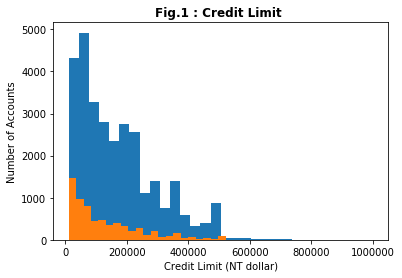

In [49]:
# Visualize all of the attributes, based on their total and default distribution.
# Credit Limit, feature name: 'LIMIT_BAL'
%matplotlib inline
plt.hist ( df.LIMIT_BAL, bins = 30, label = 'Total')
plt.hist ( df.LIMIT_BAL [df [ 'def_pay'] == 1 ], bins = 30, label = 'Default' )
plt.xlabel ('Credit Limit (NT dollar)');plt.ylabel('Number of Accounts')
plt.title ('Fig.1 : Credit Limit ',fontweight = "bold", size = 12)
# The output means: 

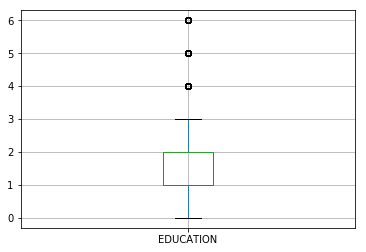

In [71]:
# Education level, feature name: EDUCATION

# Check the inconsisdency of 'EDUCATION' feature.
df.boxplot(column=['EDUCATION'], return_type='axes')
# The result means: there are 3 attributes not included in the data description, 0, 5, 6. They're inconsisdency values.

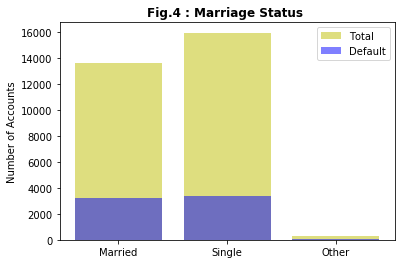

In [114]:
# Marriage status, feature name: 'MARRIAGE'
married = df['MARRIAGE'] [df ['MARRIAGE'] == 1]. count ()
married_default = df ['MARRIAGE'] [(df['MARRIAGE'] == 1) & (df['default payment next month'] == 1)]. count ()

single = df['MARRIAGE'] [df['MARRIAGE'] == 2]. count () 
single_default = df ['MARRIAGE'] [(df['MARRIAGE'] == 2) & (df['default payment next month'] == 1)]. count ()

other_m = df['MARRIAGE'] [df['MARRIAGE'] > 2]. count ()
other_m_default = df ['MARRIAGE'] [(df['MARRIAGE'] >2) & (df['default payment next month'] == 1)]. count ()

total_marriage = [married, single, other_m]
default_marriage = [married_default, single_default, other_m_default]
status = [1,2,3]

plt.bar (status, total_marriage, color = 'y', alpha = 0.5, label = 'Total')
plt.bar (status,default_marriage, color='b', alpha=0.5, label='Default')

plt.xticks ([1,2,3],['Married','Single','Other']); plt.ylabel('Number of Accounts')
plt.title('Fig.4 : Marriage Status ',fontweight="bold", size=12)
plt.legend()

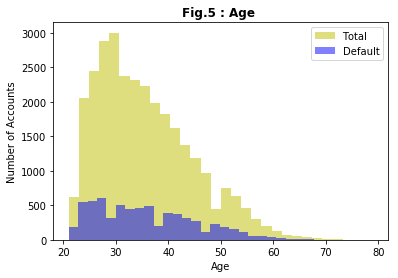

In [122]:
# Age, feature name: 'AGE'
plt.hist (df ['AGE'], bins = 30, color='y',label = 'Total', alpha=0.5)
plt.hist (df ['AGE'] [df ['default payment next month']==1], bins = 30, color='b',label = 'Default',alpha=0.5)

plt.xlabel('Age'); plt.ylabel('Number of Accounts')
plt.title('Fig.5 : Age ',fontweight="bold", size=12)
plt.legend()